In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# ML
from sklearn.cluster import KMeans
# Metrics
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

In [24]:
agnes_graphs = pd.read_excel('demo-encoded-with-clusters.xlsx')

In [25]:
df = pd.read_excel('../datasets/FoodInsecurity_Hispanic_Demographics_Tone_Preferences_Dataset.xlsx')

In [26]:
df['cluster'] = agnes_graphs['cluster']

In [27]:
df.columns

Index(['age', 'gender', 'ethnicity', 'race', 'education', 'marital_status',
       'income', 'employment', 'language', 'disability', 'states', 'sample_1',
       'sample_2', 'sample_3', 'sample_4', 'sample_5', 'sample_6', 'sample_7',
       'sample_8', 'cluster'],
      dtype='object')

In [28]:
# Define columns to keep as identifiers (non-melted columns)
id_vars = df.columns.difference(['sample_1', 'sample_2', 'sample_3', 'sample_4', 'sample_5', 'sample_6', 'sample_7', 'sample_8'])

In [29]:
# Melt dataframe
df = pd.melt(df, id_vars=id_vars, value_vars=['sample_1', 'sample_2', 'sample_3', 'sample_4', 'sample_5', 'sample_6', 'sample_7', 'sample_8'],value_name='tone')
df.drop('variable',axis=1, inplace=True)

In [30]:
df.head(2)

,age,cluster,disability,education,employment,ethnicity,gender,income,language,marital_status,race,states,tone
0,45-54,1,i do not have a disability,High School,Employed Part time,non hispanic,female,"$25,000 - $49,999",both,na,native american,indiana,Persuasive
1,18-24,2,i do not have a disability,High School,Employed Part time,hispanic,male,"Less than $25,000",english,single,white,illinois,Original


In [31]:
df.shape

(400, 13)

In [32]:
columns_to_plot = ['age', 'disability', 'education', 'employment', 'ethnicity', 'gender', 'income', 'language', 'marital_status', 'race', 'tone']

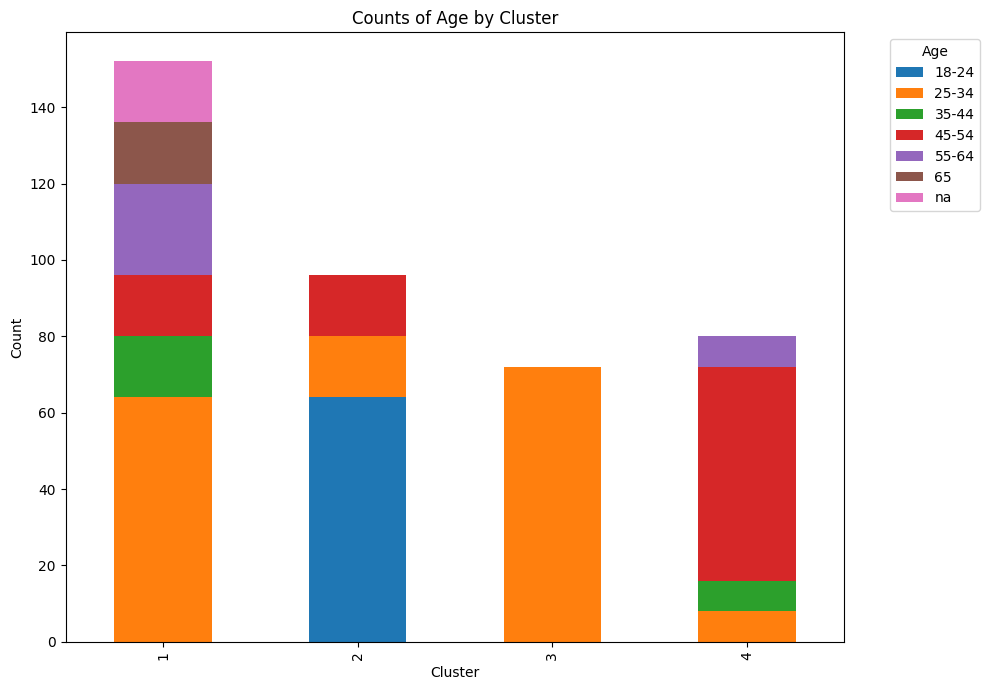

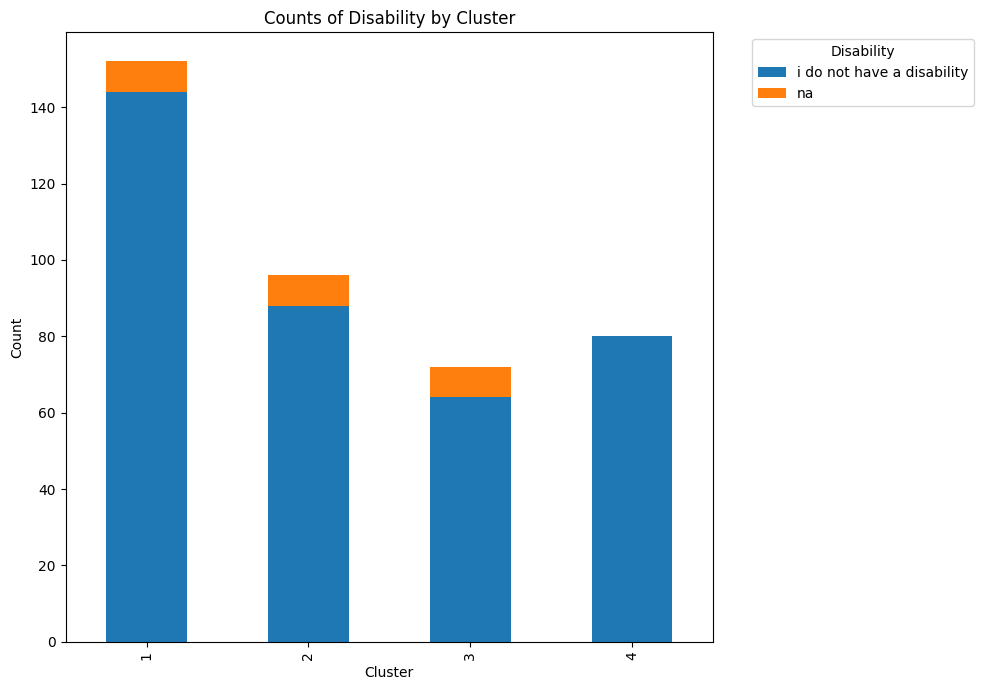

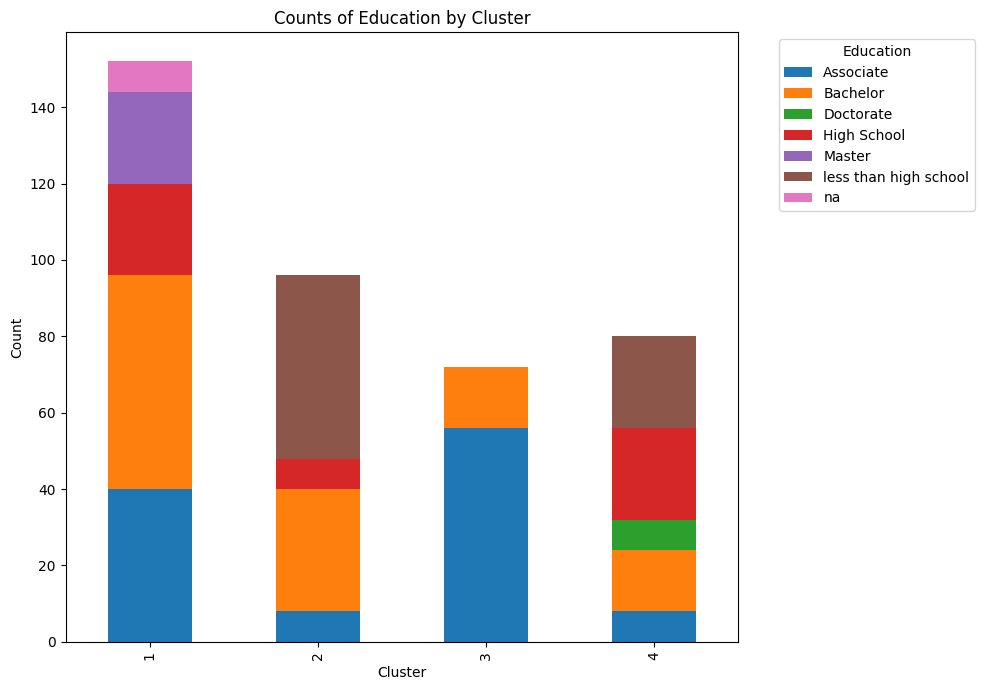

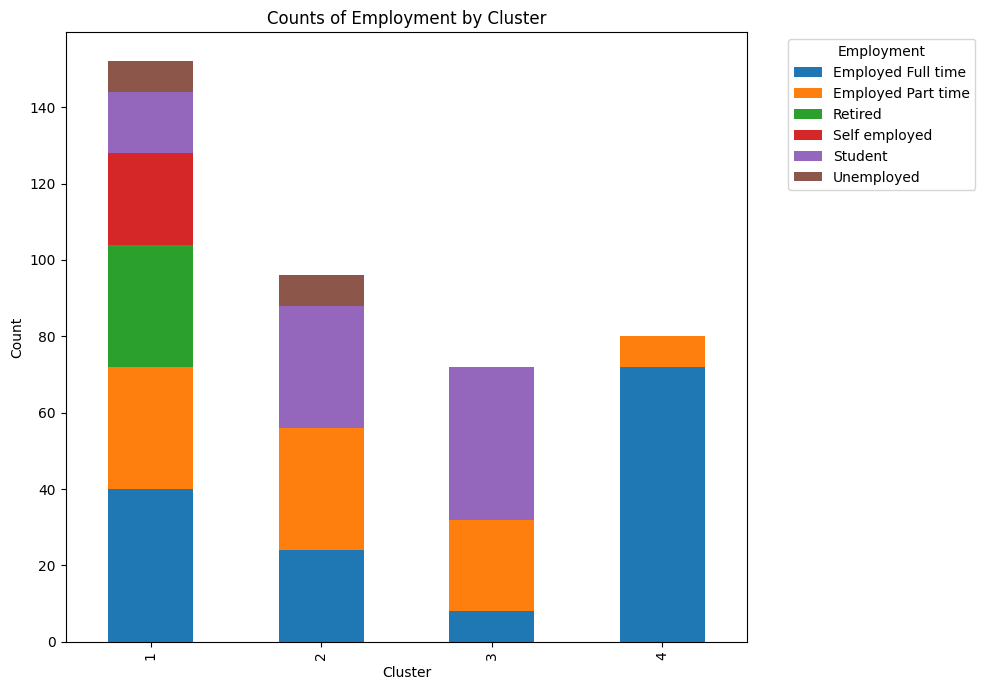

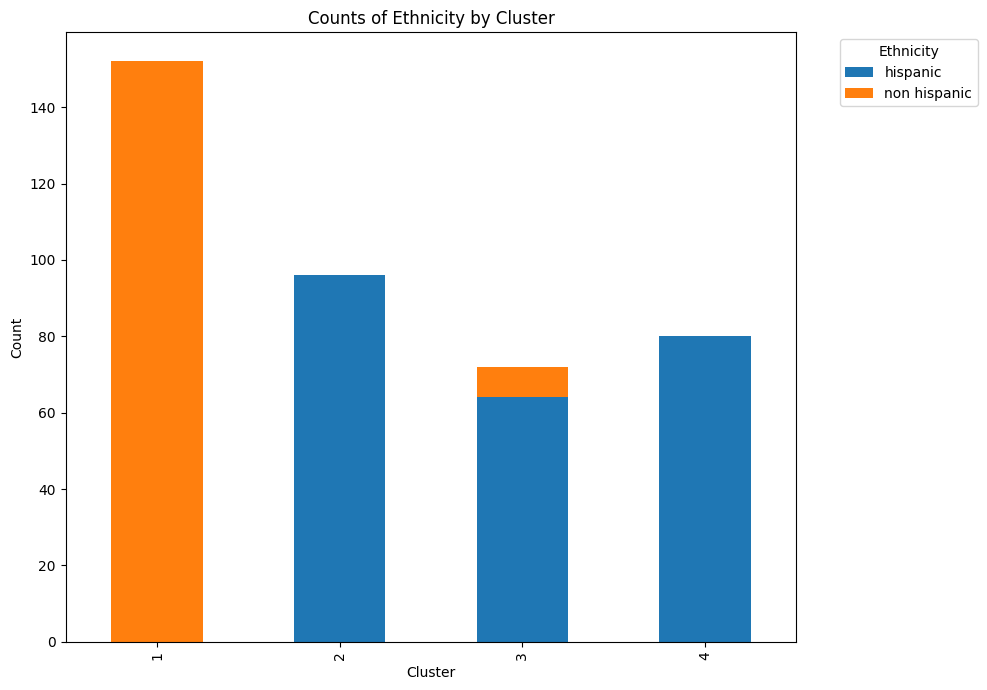

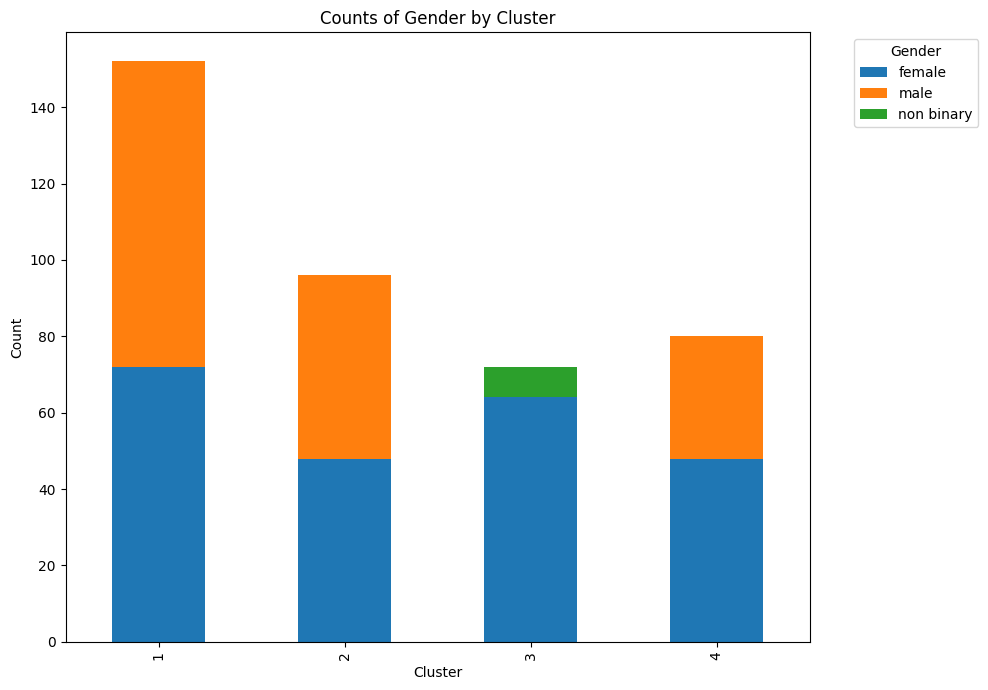

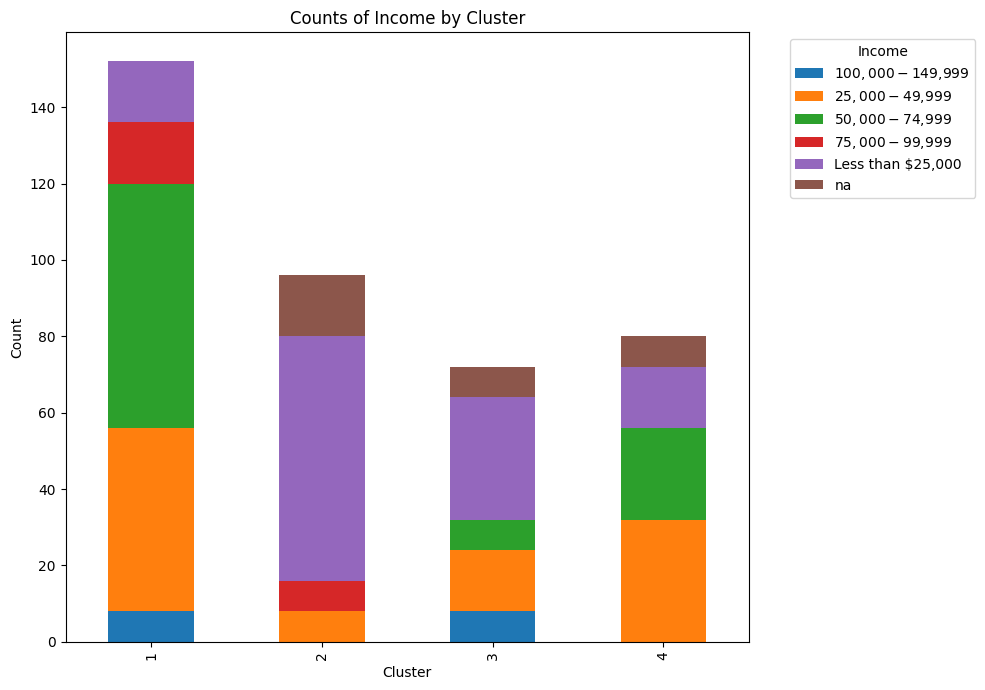

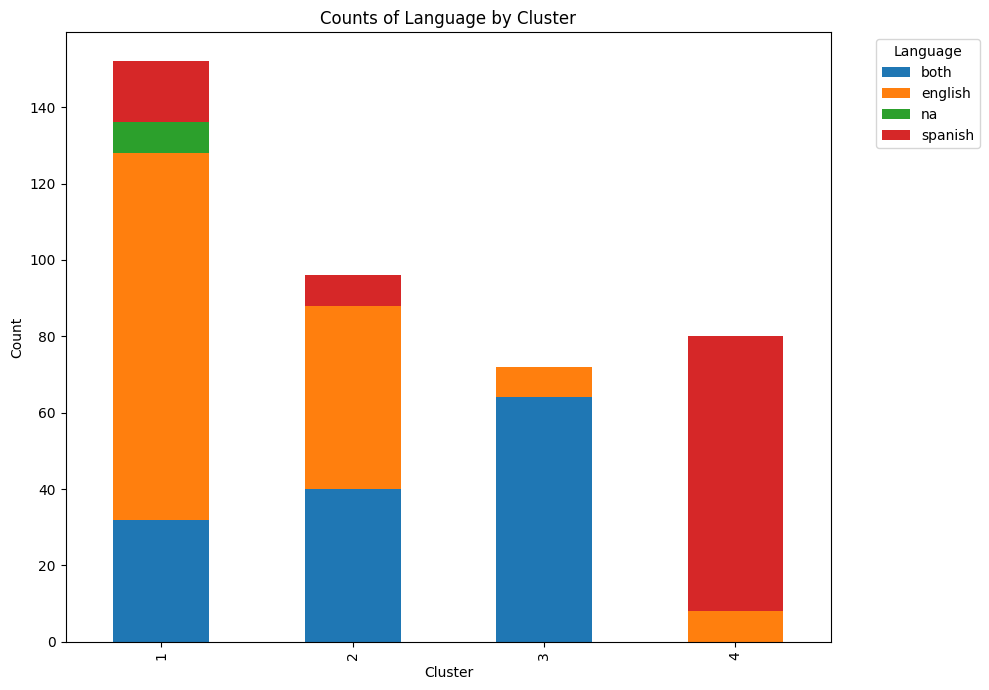

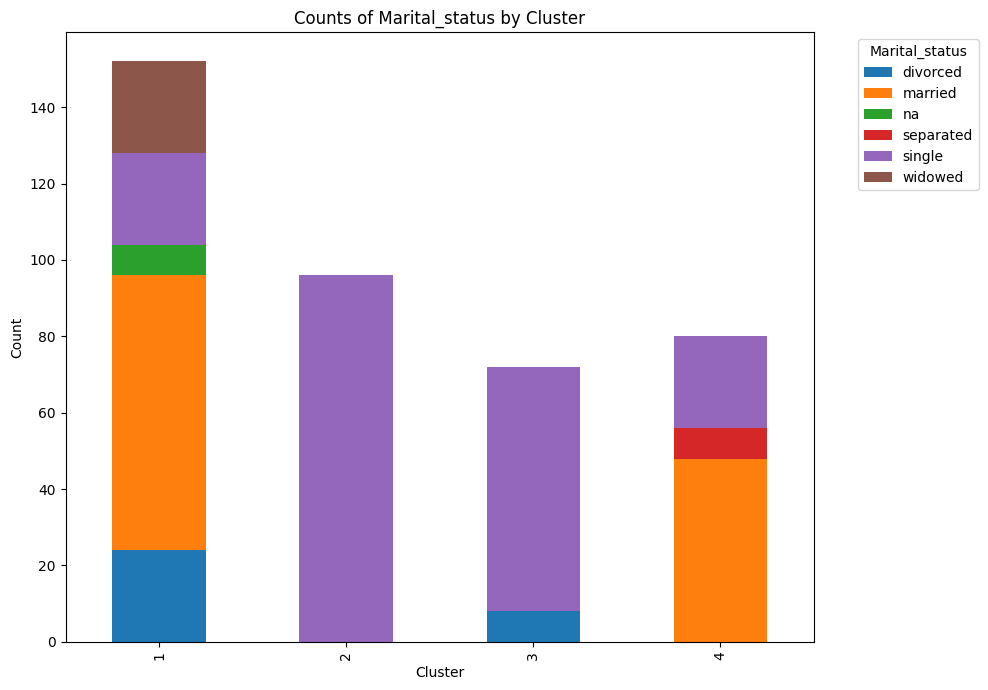

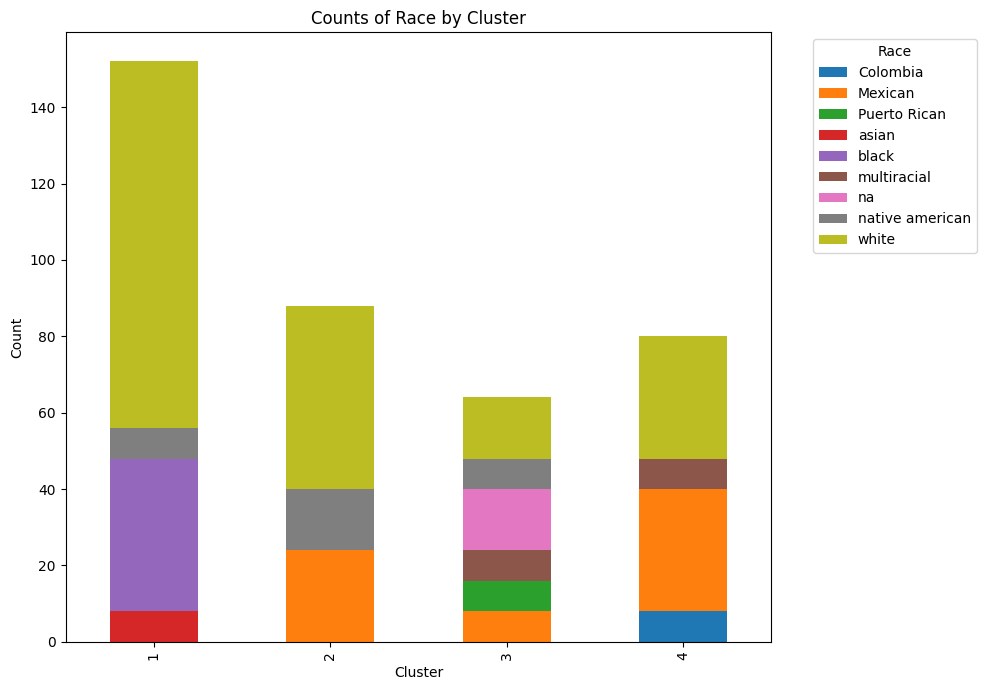

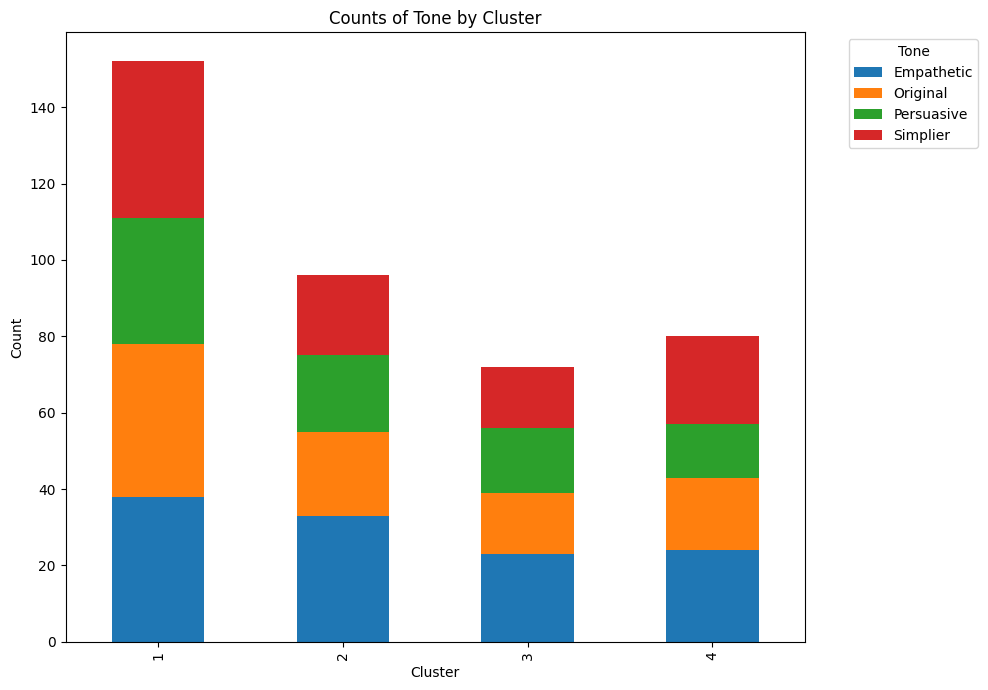

In [33]:
# Generate stacked bar charts for each column
for column in columns_to_plot:
    # Aggregate data for the given column
    cluster_option_counts = df.groupby(['cluster', column]).size().unstack(fill_value=0)
    
    # Plotting the stacked bar chart
    ax = cluster_option_counts.plot(kind='bar', stacked=True, figsize=(10, 7))
    
    # Add labels and title
    plt.xlabel('Cluster')
    plt.ylabel('Count')
    plt.title(f'Counts of {column.capitalize()} by Cluster')
    plt.legend(title=column.capitalize(), bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Show plot
    plt.tight_layout()
    plt.show()

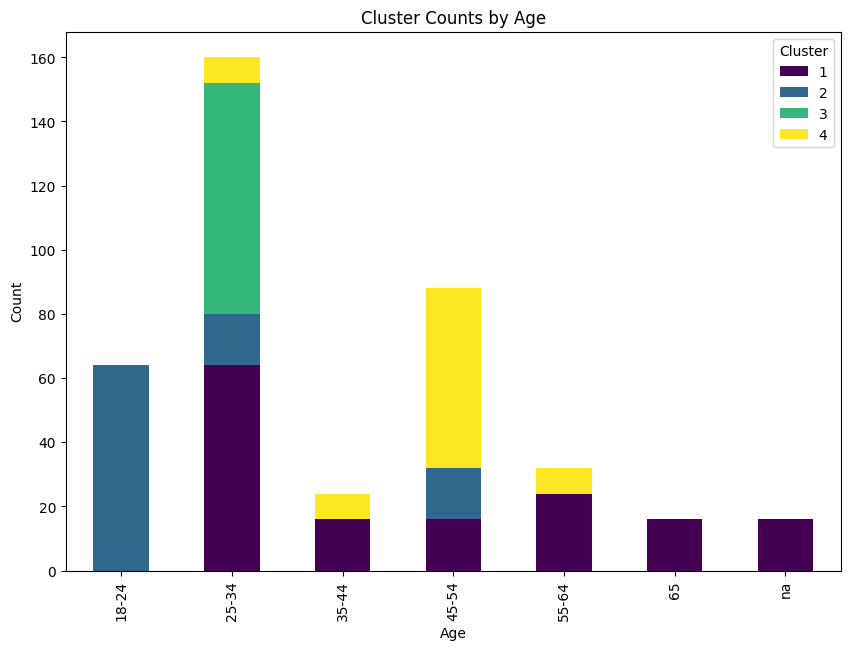

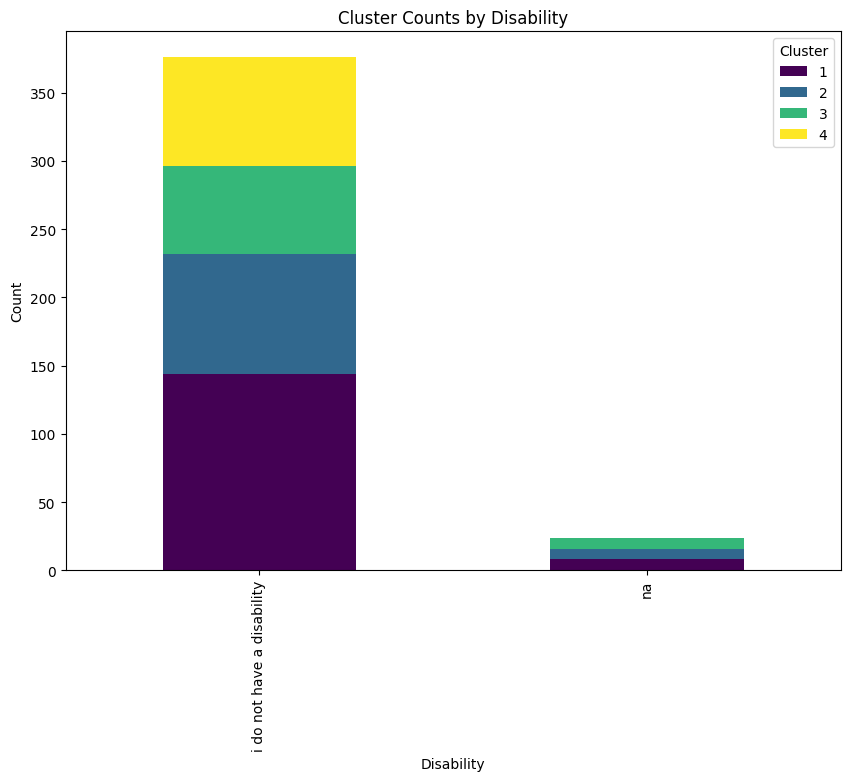

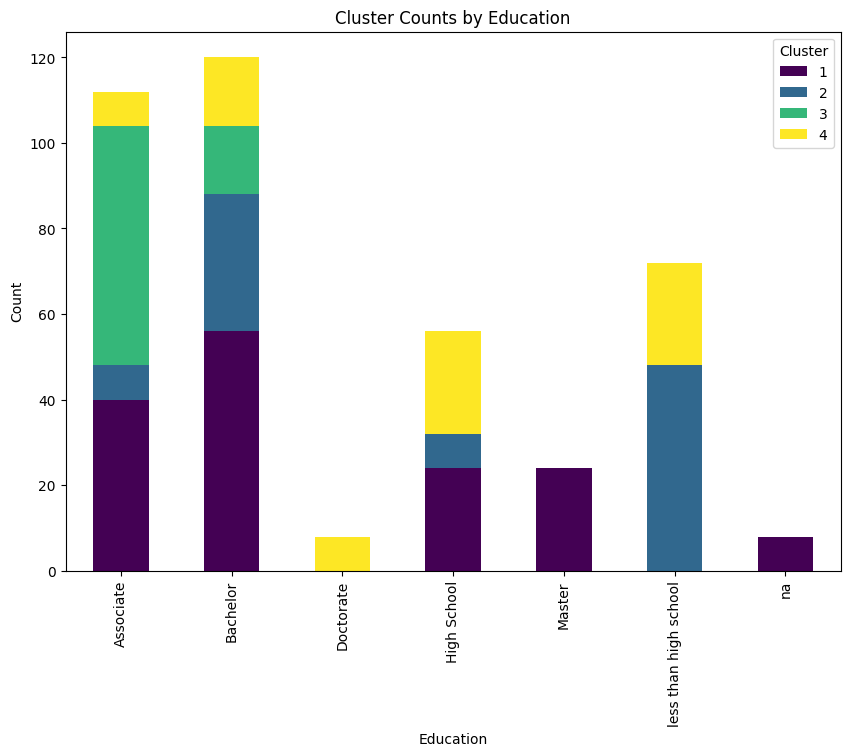

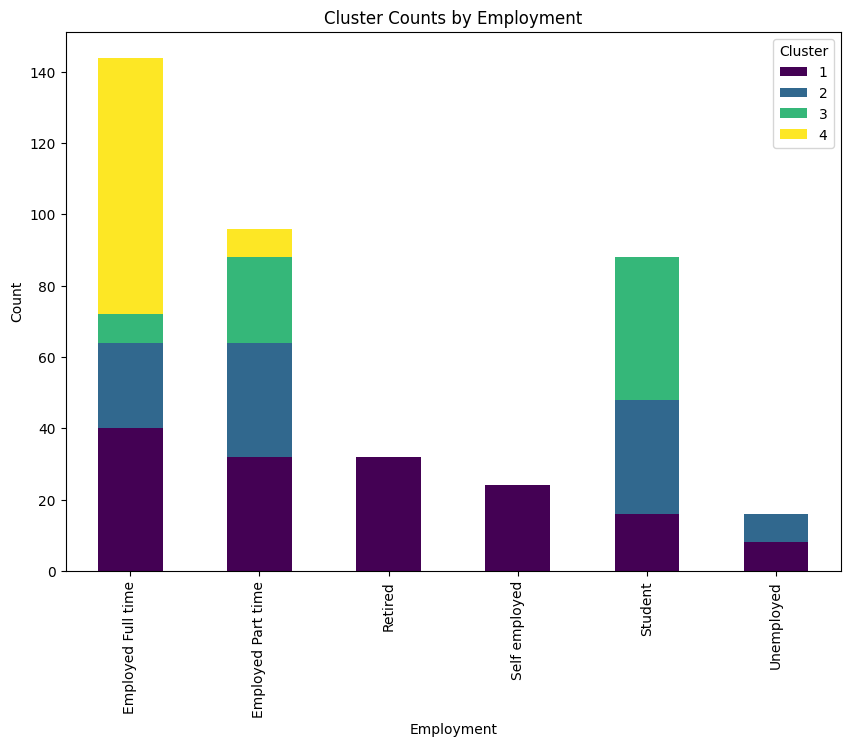

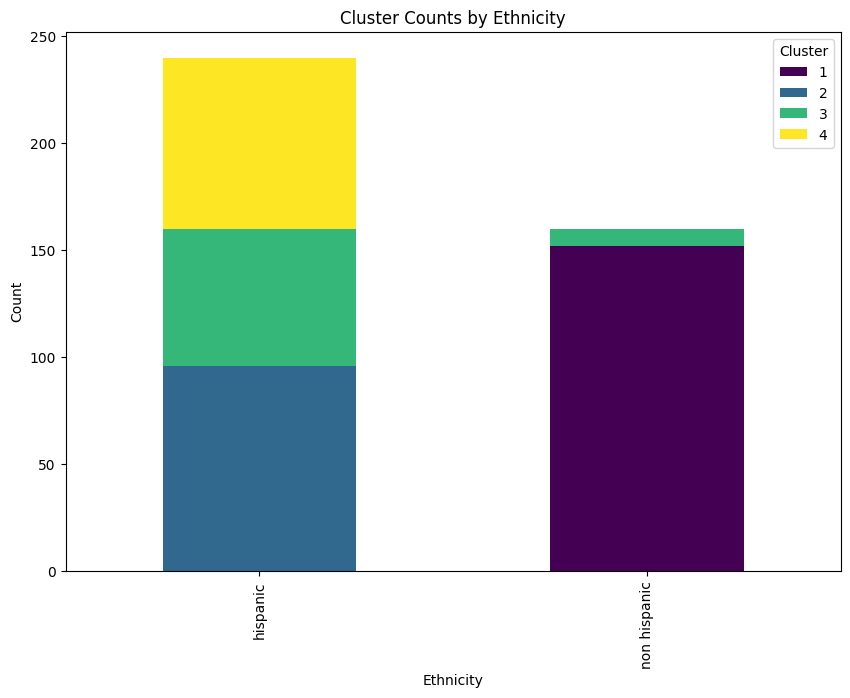

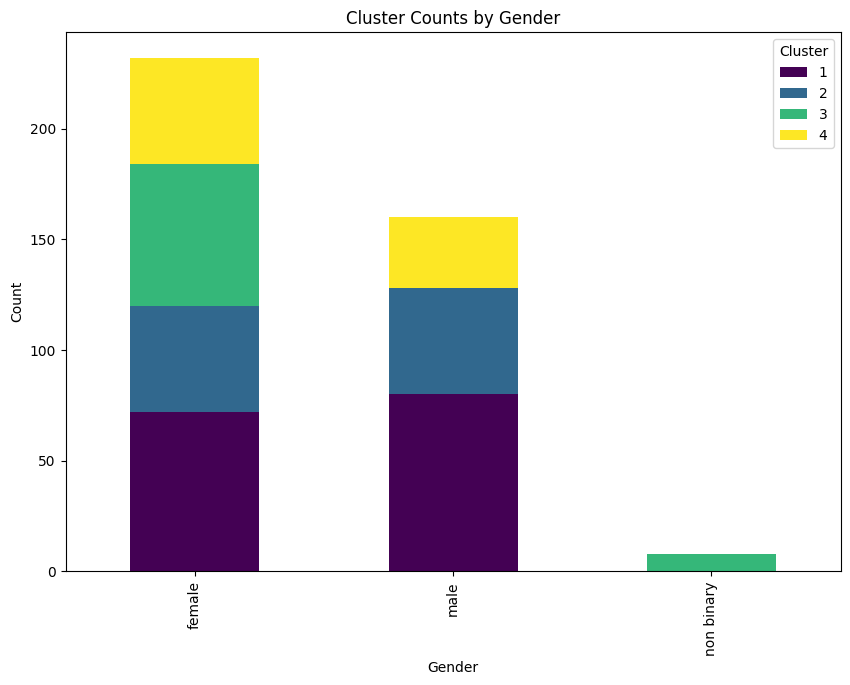

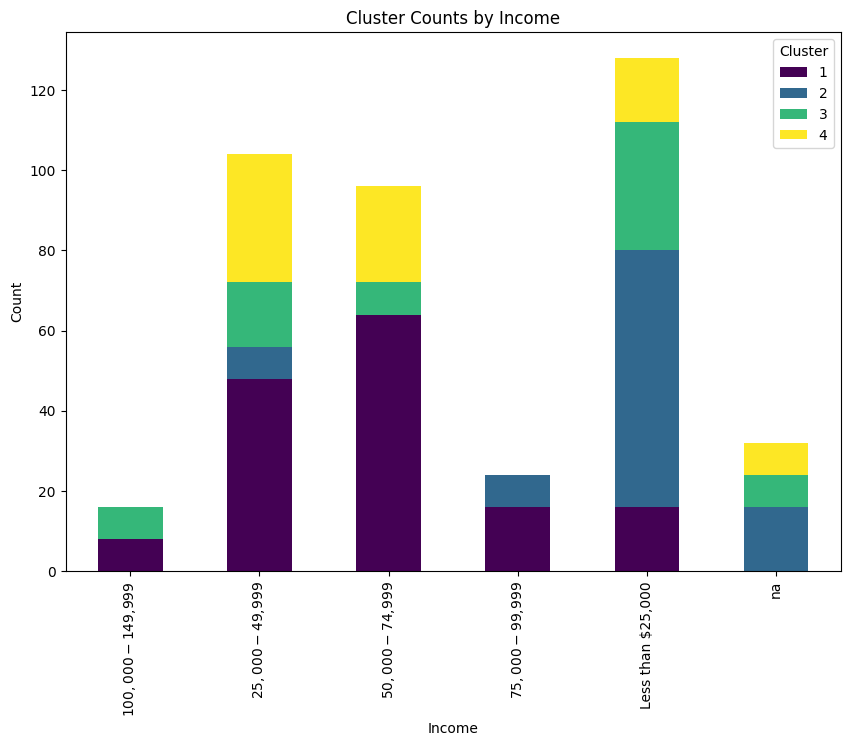

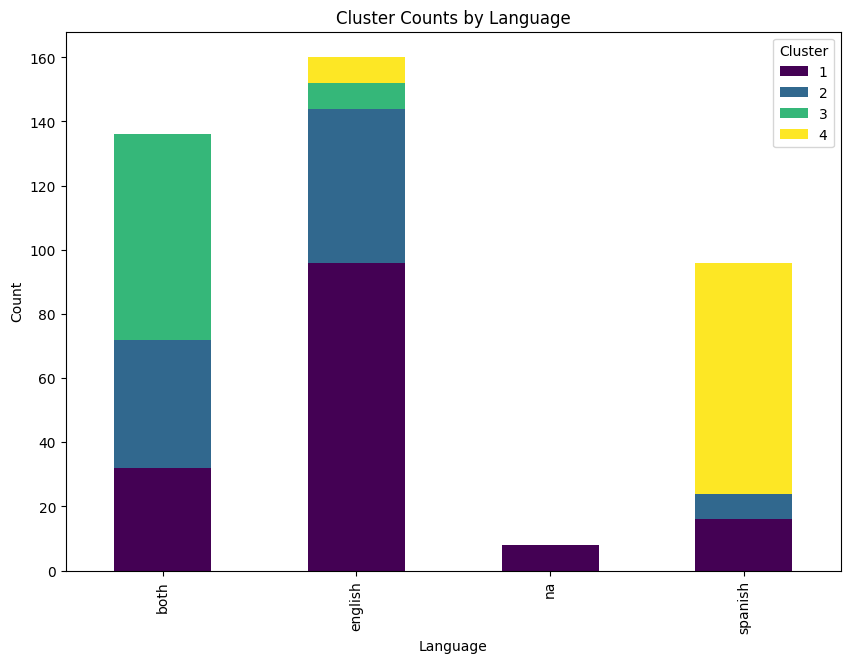

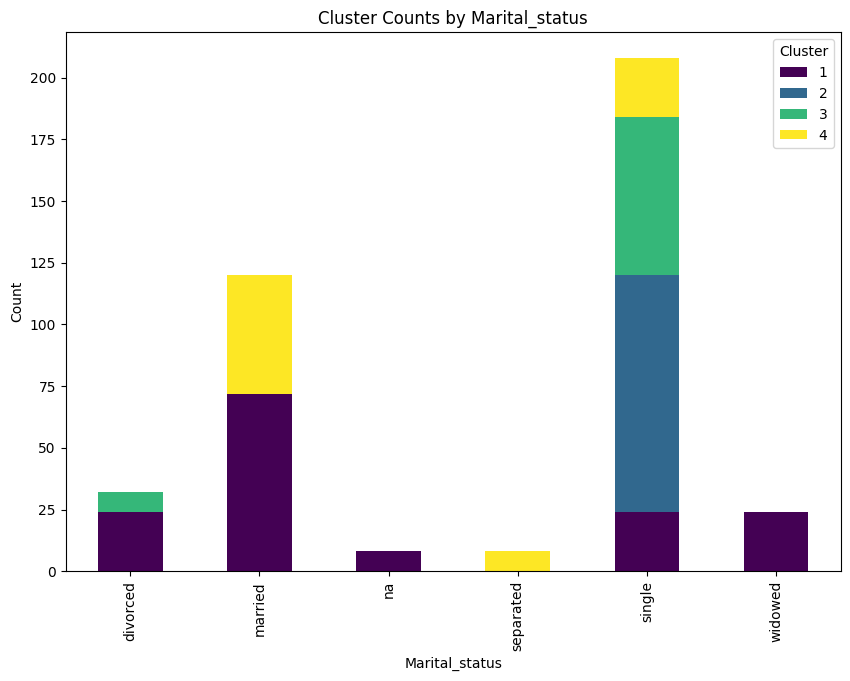

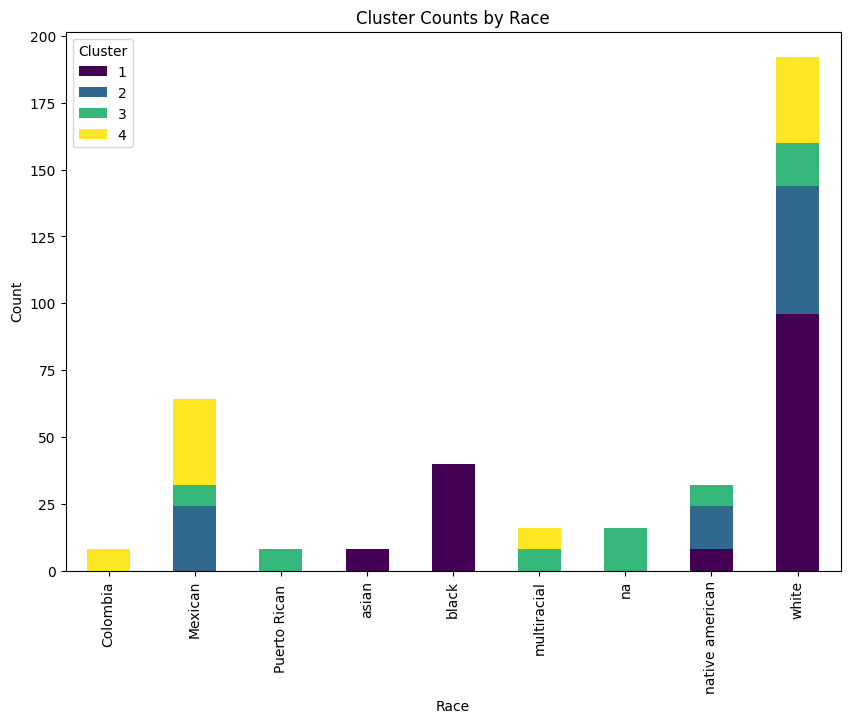

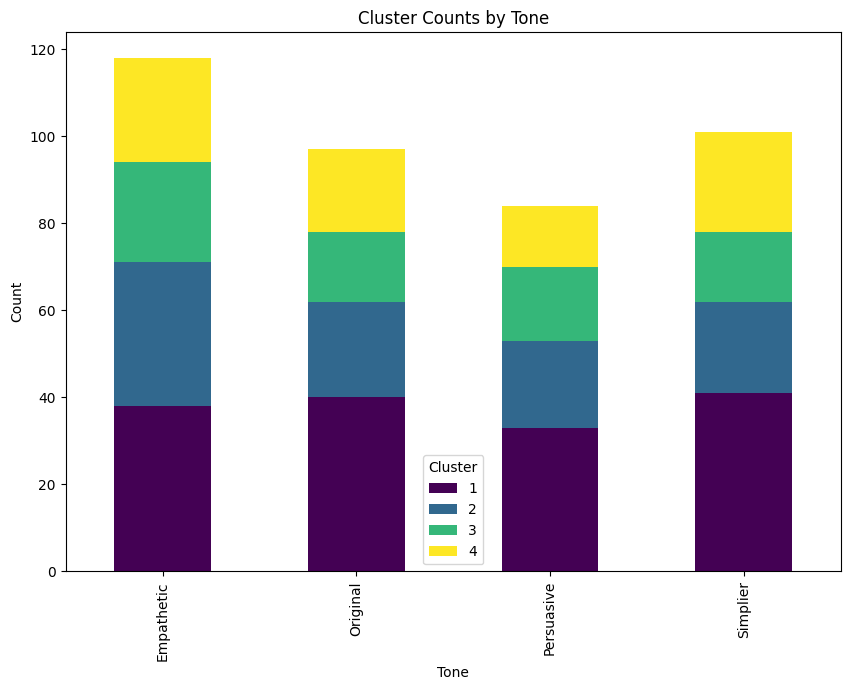

In [34]:
# List of columns to plot
columns_to_plot = ['age', 'disability', 'education', 'employment', 'ethnicity', 'gender', 'income', 
                   'language', 'marital_status', 'race', 'tone']

# Generate stacked bar charts for each column
for column in columns_to_plot:
    # Aggregate data for the given column
    column_cluster_counts = df.groupby([column, 'cluster']).size().unstack(fill_value=0)
    
    # Plotting the stacked bar chart
    ax = column_cluster_counts.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 7))
    
    # Add labels and title
    plt.xlabel(column.capitalize())
    plt.ylabel('Count')
    plt.title(f'Cluster Counts by {column.capitalize()}')
    plt.legend(title='Cluster')
    
    # Show plot
    plt.show()